In [9]:
%reload_ext autoreload
%autoreload 2

from Model import MaskDetection

# load the model
model = MaskDetection('Final_Model_Base_CNN')

{'map_location': device(type='cpu')}


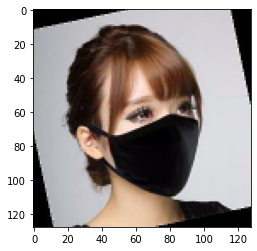

In [29]:
from Application import load_and_preprocess_img
import matplotlib.pyplot as plt

img = load_and_preprocess_img('data/aug_2/cloth_mask/0_00001_1_2_aug_0.jpeg')

plt.imshow(img.permute(1,2,0))

img_data = img.float().reshape((1, img.shape[0], img.shape[1], img.shape[2]))

In [47]:
import torch
torch.set_printoptions(profile="full")
rs = model.predict(img_data)
rs = rs.detach().numpy().reshape(5)

print(rs)
print(rs.argmax())

label_map = {
    0: 'cloth_mask',
    1: 'no_face_mask',
    2: 'surgical_mask',
    3: 'n95_mask',
    4: 'mask_worn_incorrectly',
}

# print the label
print(label_map[rs.argmax().item()])

[ 13.254726  -26.513565  -35.206757   -7.8796496 -19.472052 ]
0
cloth_mask
